## Road gradient problem

In [22]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

#according to the data given:
n=100
x=np.linspace(1,101,100)
e=np.array([5*np.sin(3*np.pi*i/n)+np.sin(10*np.pi*i/n) for i in x])
d=np.arange(1,101,1)

e=np.reshape(e,(n,1))
d=np.reshape(d,(n,1))

#function defined wrt the construction cost to be minimized
def total_cost(rang):
  phi_fill=np.array([2*(cp.maximum(x,0))**2 + 30*cp.maximum(x,0) for x in rang])
  phi_cut=np.array([12*(cp.maximum(-x,0))**2 + cp.maximum(-x,0) for x in rang])
  overall_cost =phi_fill + phi_cut
  return (overall_cost)

#defining Variables
h= cp.Variable((n,1))
u = h-e


#Creating an empty list of constraints 
constraints= list() 

#Let the derivatives be defined as G1(1st derivative), G2(2nd derivative), G3(3rd derivative)
G1 = np.zeros((n,1))
G2 = np.zeros((n,1))
G3 = np.zeros((n,1))

G1 = np.array([h[i+1]-h[i] for i in range(n-1)]) 
G2 = np.array([G1[i+1]-G1[i] for i in range(n-2)])
G3 = np.array([G2[i+1]-G2[i] for i in range(n-3)])

#Values in the question given as:
D1=0.08
D2=0.025
D3=0.005

#Appending the required constraints to the empty list created above

G1=h[1:(h.shape[0])-1]-h[0:(h.shape[0])-2]
G2=G1[1:(G1.shape[0])-1]-G1[0:(G1.shape[0])-2]
G3=G2[1:(G2.shape[0])-1]-G2[0:(G2.shape[0])-2]
constraints=[cp.max(cp.abs(G1))<=D1]
constraints+=[cp.max(cp.abs(G2))<=D2]
constraints+=[cp.max(cp.abs(G3))<=D3]

#Function call
overall_cost = total_cost(u)

#defining problem
objective=cp.Minimize(cp.abs(sum(overall_cost)))
prob=cp.Problem(objective,constraints)

# solving the problem
prob.solve()

#Required results
print("optimal total cost of construction is:","\n",prob.solve())
print("optimal status:","\n",prob.status)
print("height of the roadbed that should be chosen are:","\n",h.value)


optimal total cost of construction is: 
 7520.570154150903
optimal status: 
 optimal
height of the roadbed that should be chosen are: 
 [[ 2.48763058]
 [ 2.56763054]
 [ 2.64763054]
 [ 2.72763058]
 [ 2.80563058]
 [ 2.87663045]
 [ 2.93563011]
 [ 2.97762946]
 [ 2.99762843]
 [ 2.99262748]
 [ 2.96262662]
 [ 2.91262586]
 [ 2.84762527]
 [ 2.77262493]
 [ 2.6926249 ]
 [ 2.61262488]
 [ 2.53262485]
 [ 2.45262483]
 [ 2.3726248 ]
 [ 2.29262477]
 [ 2.21262474]
 [ 2.13262471]
 [ 2.05262468]
 [ 1.97262465]
 [ 1.89262462]
 [ 1.81262459]
 [ 1.73262456]
 [ 1.65262453]
 [ 1.5726245 ]
 [ 1.49262447]
 [ 1.41262444]
 [ 1.33262441]
 [ 1.25262438]
 [ 1.17262435]
 [ 1.09262432]
 [ 1.0126243 ]
 [ 0.93262427]
 [ 0.85262424]
 [ 0.77262421]
 [ 0.69262419]
 [ 0.61262416]
 [ 0.53262413]
 [ 0.45262411]
 [ 0.37262409]
 [ 0.29262407]
 [ 0.2146691 ]
 [ 0.14375926]
 [ 0.0848946 ]
 [ 0.04307517]
 [ 0.02330101]
 [ 0.02852676]
 [ 0.05870798]
 [ 0.10884431]
 [ 0.17393542]
 [ 0.24898112]
 [ 0.3289813 ]
 [ 0.40898127]
 [ 0.4889

##Plot for the height of the roadbed vs distance down the road

Text(0, 0.5, 'height of the roadbed')

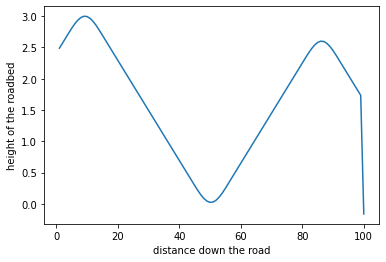

In [24]:
plt.figure()
plt.plot(d,h.value)
plt.xlabel("distance down the road")
plt.ylabel("height of the roadbed")


##Plot for the elevation(e) vs distance down the road

Text(0, 0.5, 'elevation')

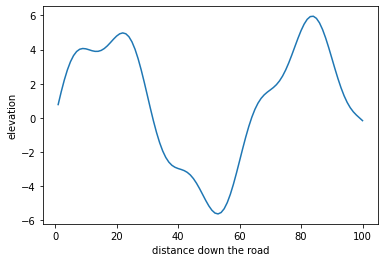

In [23]:
plt.figure()
plt.plot(d,e)
plt.xlabel("distance down the road")
plt.ylabel("elevation")

##Plot for 'u' (which is difference between the existing elevation and height of the roadbed.) vs distance (d)

Text(0, 0.5, 'u')

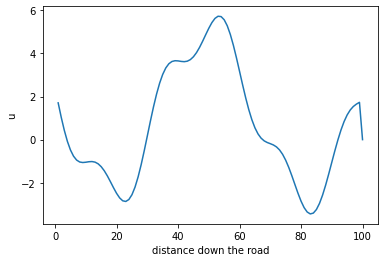

In [28]:
plt.figure()
plt.plot(d,(h.value-e)) 
plt.xlabel("distance down the road")
plt.ylabel("u")

#Plot for the fill cost as a function of 'u' 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Text(0, 0.5, 'fill cost')

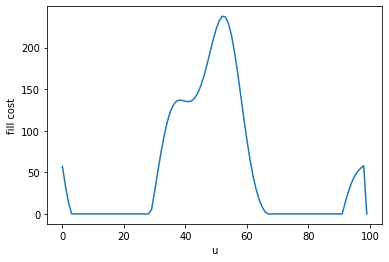

In [29]:
fhi_cut=np.array([12*(max(-x,0))**2 + max(-x,0) for x in u.value])
fhi_fill=np.array([2*(max(x,0))**2 + 30*max(x,0) for x in u.value])
plt.figure()
plt.plot(fhi_fill)
plt.xlabel("u")
plt.ylabel("fill cost")


##plot for cut cost as a fuction of 'u'

Text(0, 0.5, 'Cut cost')

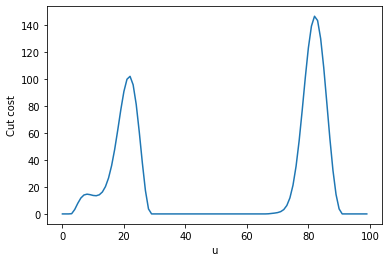

In [27]:
plt.figure()
plt.plot(fhi_cut)
plt.xlabel("u")
plt.ylabel("Cut cost")